# Province Gender Available Twitter Data - Metadata Statistics

In [1]:
import gzip
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
pcodes = {"1": "Adana", "2": "Adıyaman", "3": "Afyonkarahisar", "4": "Ağrı", "68": "Aksaray", "5": "Amasya", "6": "Ankara",
          "7": "Antalya", "75": "Ardahan", "8": "Artvin", "9": "Aydın", "10": "Balıkesir", "74": "Bartın", "72": "Batman",
          "69": "Bayburt", "11": "Bilecik", "12": "Bingöl", "13": "Bitlis", "14": "Bolu", "15": "Burdur", "16": "Bursa",
          "17": "Çanakkale", "18": "Çankırı", "19": "Çorum", "20": "Denizli", "21": "Diyarbakır", "81": "Düzce", "22": "Edirne",
          "23": "Elazığ", "24": "Erzincan", "25": "Erzurum", "26": "Eskişehir", "27": "Gaziantep", "28": "Giresun",
          "29": "Gümüşhane", "30": "Hakkâri", "31": "Hatay", "76": "Iğdır", "32": "Isparta", "34": "İstanbul", "35": "İzmir",
          "46": "Kahramanmaraş", "78": "Karabük", "70": "Karaman", "36": "Kars", "37": "Kastamonu", "38": "Kayseri",
          "71": "Kırıkkale", "39": "Kırklareli", "40": "Kırşehir", "79": "Kilis", "41": "Kocaeli", "42": "Konya",
          "43": "Kütahya", "44": "Malatya", "45": "Manisa", "47": "Mardin", "33": "Mersin", "48": "Muğla", "49": "Muş",
          "50": "Nevşehir", "51": "Niğde", "52": "Ordu", "80": "Osmaniye", "53": "Rize", "54": "Sakarya", "55": "Samsun",
          "56": "Siirt", "57": "Sinop", "58": "Sivas", "63": "Şanlıurfa", "73": "Şırnak", "59": "Tekirdağ", "60": "Tokat",
          "61": "Trabzon", "62": "Tunceli", "64": "Uşak", "65": "Van", "77": "Yalova", "66": "Yozgat", "67": "Zonguldak"}

## Read Data from Gzip

In [3]:
with gzip.open("province_gender_available_metadata_added-220529_combined.txt.gz", "rb") as f:
    users = f.readlines()
    
for i in range(len(users)):
    users[i] = json.loads(users[i].decode("utf-8"))

In [4]:
print(f"Total User Count: {len(users)}")

Total User Count: 437062


## Create DataFrame

In [5]:
df = pd.DataFrame(users)

In [6]:
df.shape

(437062, 15)

In [7]:
df.head(3)

,location,description,name,screen_name,id_str,created_at,province_codes,genders,following,followers,tweets,followers_count,following_count,pp,downloaded
0,adana,valoda gold 3üm\nlolde plat\nfinansör ekonomis...,berker şimşek,400knocturne,2855327902,Sat Nov 01 17:50:51 +0000 2014,"[{'source': 'location', 'pcode': 1}, {'source'...","[{'source': 'name', 'gender': 'male'}]","[1483531432270172164, 1146090646928838658, 149...","[1187756325192847361, 1355500564289904642, 108...","[{'ref_twt_id_str': '1527014300828721154', 're...",42,51,1492419228812685312/ua_FV0zM_normal.jpg,220522
1,"izmit, kocaeli",ayrılığında vahşi bir tadı var,mesutaçıkgöz,mesutackgooz,1118564079554191360,Wed Apr 17 17:17:13 +0000 2019,"[{'source': 'location', 'pcode': 41}, {'source...","[{'source': 'name', 'gender': 'male'}, {'sourc...","[1522986391872933889, 1239333710102704128, 106...","[1522986391872933889, 1113184704658849792, 145...","[{'twt_id_str': '1522033987962785792', 'twt_tx...",111,136,1522033967117094912/9BEvO8FL_normal.jpg,220522
2,,istanbul/giresun🇹🇷,rümeysa çınar,rumcnar28,835152748492410881,Fri Feb 24 15:41:46 +0000 2017,"[{'source': 'description', 'pcode': 28}, {'sou...","[{'source': 'name', 'gender': 'female'}]","[440199117, 348414752, 2265646851, 72559653269...",[990728281791098881],[],1,19,835153701308362753/5t98EzZF_normal.jpg,220522


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437062 entries, 0 to 437061
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   location         437062 non-null  object
 1   description      437062 non-null  object
 2   name             437062 non-null  object
 3   screen_name      437062 non-null  object
 4   id_str           437062 non-null  object
 5   created_at       437062 non-null  object
 6   province_codes   437062 non-null  object
 7   genders          437062 non-null  object
 8   following        437062 non-null  object
 9   followers        437062 non-null  object
 10  tweets           437062 non-null  object
 11  followers_count  437062 non-null  object
 12  following_count  437062 non-null  object
 13  pp               437062 non-null  object
 14  downloaded       437062 non-null  object
dtypes: object(15)
memory usage: 50.0+ MB


## Download Counts

In [9]:
download_counts = pd.DataFrame(df["downloaded"].value_counts().sort_index()).reset_index().rename({"index": "date", "downloaded":"download_count"}, axis=1)
download_counts["date"] = download_counts["date"].apply(lambda x: x[4:] + "/" + x[2:4] + "/" + "20" + x[:2])
download_counts = download_counts.set_index("date")
download_counts

,download_count
date,
18/03/2022,50146
19/03/2022,303
20/03/2022,202
21/03/2022,221
22/03/2022,750
23/03/2022,1440
24/03/2022,1430
25/03/2022,1440
26/03/2022,1440


## User Statistics

In [10]:
province_codes_sources = []

for item in df["province_codes"]:
    province_codes_sources.append(item[0]['source'])
    
print("Province Code Source Counts:")
display(pd.Series(province_codes_sources).value_counts())

Province Code Source Counts:


location       314669
description    122387
screen_name         6
dtype: int64

In [11]:
gender_sources = []

for item in df["genders"]:
    gender_sources.append(item[0]['source'])
    
print("Gender Source Counts:")
display(pd.Series(gender_sources).value_counts())

Gender Source Counts:


name           413802
screen_name     23017
description       243
dtype: int64

### User Statistics - Location

In [12]:
sehir_counts = df["province_codes"].apply(lambda x: pcodes[str(x[0]["pcode"])]).value_counts()
sehir_counts = pd.DataFrame(sehir_counts).reset_index().rename({"index": "sehir", "province_codes":"user_count"}, axis=1)

In [13]:
sehir_counts[:60]

,sehir,user_count
0,İstanbul,110948
1,İzmir,32611
2,Ankara,28634
3,Trabzon,17393
4,Bursa,17156
5,Antalya,15909
6,Mersin,15077
7,Adana,11618
8,Kocaeli,9441
9,Konya,7762


In [14]:
sehir_counts[60:]

,sehir,user_count
60,Kars,1001
61,Bartın,990
62,Nevşehir,989
63,Kırıkkale,984
64,Muş,969
65,Sinop,935
66,Erzincan,870
67,Bitlis,841
68,Karaman,834
69,Burdur,815


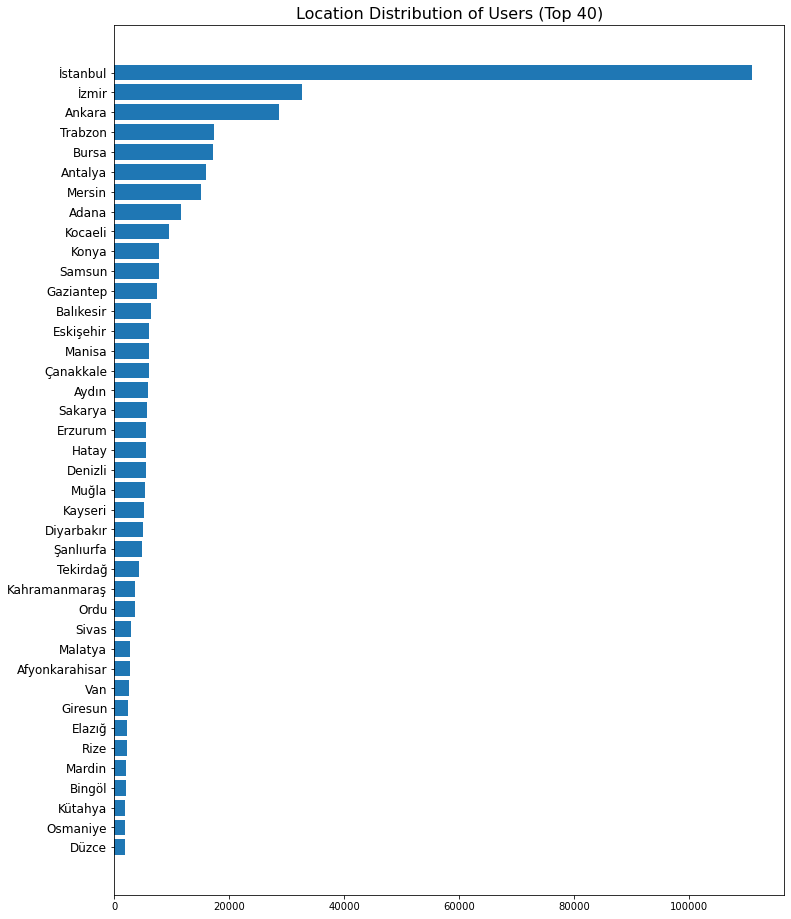

In [15]:
plt.figure(figsize=(12, 16))

plt.barh(sehir_counts["sehir"][:40], sehir_counts["user_count"][:40])
plt.title("Location Distribution of Users (Top 40)", fontsize=16)
plt.yticks(fontsize=12)
plt.gca().invert_yaxis()
plt.show()

### User Statistics - Gender

In [16]:
gender_counts = pd.DataFrame(df["genders"].apply(lambda x: x[0]["gender"]).value_counts()).reset_index().rename({"index": "gender", "genders": "count"}, axis=1)
gender_counts = pd.concat([gender_counts, pd.Series([f"{x:.2f}%" for x in gender_counts["count"] / df.shape[0] * 100], name="percentages")], axis=1)
gender_counts = gender_counts.set_index("gender")
gender_counts

,count,percentages
gender,,
male,293504,67.15%
female,143558,32.85%


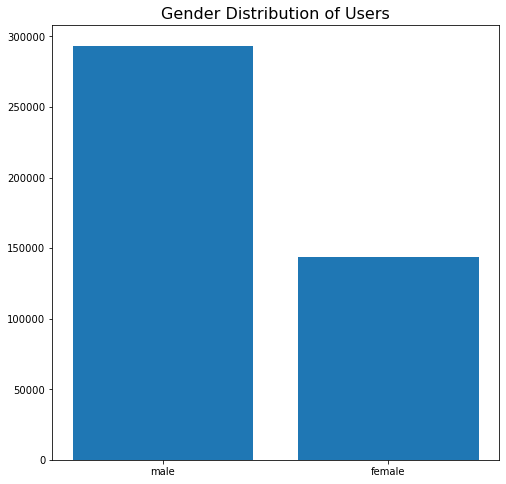

In [17]:
gender_counts = gender_counts.reset_index()
plt.figure(figsize=(8, 8))

plt.bar(gender_counts["gender"], gender_counts["count"])
plt.title("Gender Distribution of Users", fontsize=16)
plt.show()

## Tweet Statistics

In [19]:
all_tweet_ids = []

for tweet_list in df["tweets"]:
    for tweet in tweet_list:
        if tweet["type"] == "original":
            all_tweet_ids.append(tweet["twt_id_str"])
        elif tweet["type"] == "reply":
            all_tweet_ids.append(tweet["twt_id_str"])
            all_tweet_ids.append(tweet["ref_twt_id_str"])
        elif tweet["type"] == "retweet":
            all_tweet_ids.append(tweet["ref_twt_id_str"])
        elif tweet["type"] == "quote":
            all_tweet_ids.append(tweet["twt_id_str"])
            all_tweet_ids.append(tweet["ref_twt_id_str"])
        elif tweet["type"] == "fav":
            all_tweet_ids.append(tweet["ref_twt_id_str"])
        else:
            print(tweet["type"])

In [20]:
print(f"Total number of tweets: {len(all_tweet_ids)}")
print(f"Number of unique tweets: {len(set(all_tweet_ids))}")

Total number of tweets: 15979879
Number of unique tweets: 11669845


### Tweet Statistics - Tweet Counts by Tweet Type

In [21]:
original_count = 0
reply_count = 0
retweet_count = 0
quote_count = 0
fav_count = 0

for i in range(len(df)):
    for tweet in df.loc[i, "tweets"]:
        if tweet["type"] == "original":
            original_count += 1
        elif tweet["type"] == "reply":
            reply_count += 1
        elif tweet["type"] == "retweet":
            retweet_count += 1
        elif tweet["type"] == "quote":
            quote_count += 1
        elif tweet["type"] == "fav":
            fav_count += 1

In [22]:
tweets = []

for tweet_list in df["tweets"]:
    for tweet in tweet_list:
        tweets.append(tweet)

In [23]:
tweet_counts_by_type = pd.concat([pd.Series(["original", "reply", "retweet", "quote", "fav", "total"],
                                            name="tweet_type"),
                                  pd.Series([original_count, reply_count, retweet_count, quote_count, fav_count, len(tweets)],
                                            name="count")],
                                 axis=1)
tweet_counts_by_type = pd.concat([tweet_counts_by_type, pd.Series([f"{x:.2f}%" for x in tweet_counts_by_type["count"] / len(tweets) * 100], name="percentages")], axis=1)
tweet_counts_by_type = tweet_counts_by_type.set_index("tweet_type")
tweet_counts_by_type

,count,percentages
tweet_type,,
original,1044539,6.77%
reply,522266,3.39%
retweet,497045,3.22%
quote,32474,0.21%
fav,13328815,86.41%
total,15425139,100.00%


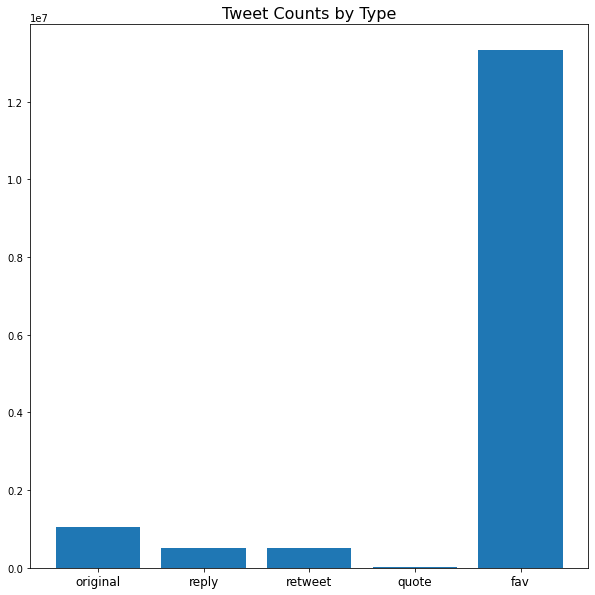

In [24]:
tweet_counts_by_type = tweet_counts_by_type.reset_index()
tweet_counts_by_type = tweet_counts_by_type.drop(5)

plt.figure(figsize=(10, 10))

plt.bar(tweet_counts_by_type["tweet_type"], tweet_counts_by_type["count"])
plt.title("Tweet Counts by Type", fontsize=16)
plt.xticks(fontsize=12)
plt.show()

### Tweet Statistics - Tweet Counts by Year

In [25]:
tweet_years = []

for tweet_list in df["tweets"]:
    for tweet in tweet_list:
        if "-" in tweet["twt_date"]:
            tweet_years.append(tweet["twt_date"][:4])
        else:
            tweet_years.append("20" + tweet["twt_date"][:2])

In [26]:
yearly_tweet_counts = pd.DataFrame(pd.Series(tweet_years).value_counts().sort_index()).reset_index().rename({"index":"year", 0:"count"}, axis=1)
yearly_tweet_counts = pd.concat([yearly_tweet_counts, pd.Series([f"{x:.3f}%" for x in yearly_tweet_counts["count"] / yearly_tweet_counts["count"].sum() * 100], name="percentages")], axis=1)
yearly_tweet_counts = yearly_tweet_counts.set_index("year")
yearly_tweet_counts

,count,percentages
year,,
2006,156,0.001%
2007,23,0.000%
2008,90,0.001%
2009,435,0.003%
2010,2274,0.015%
2011,18498,0.120%
2012,53486,0.347%
2013,205130,1.330%
2014,504602,3.271%


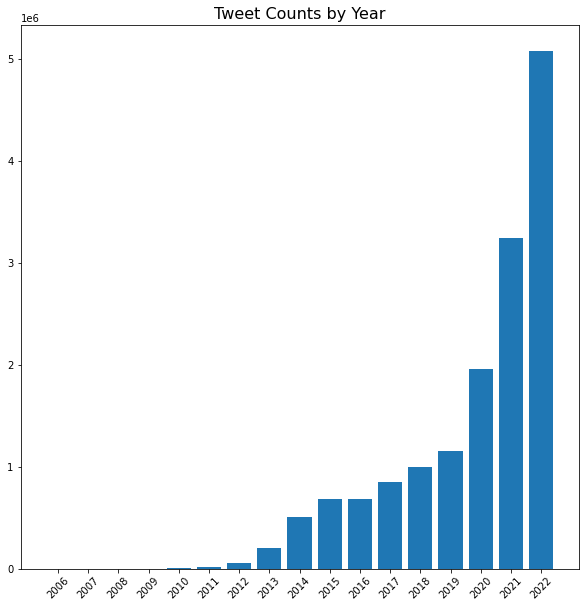

In [27]:
yearly_tweet_counts = yearly_tweet_counts.reset_index()

plt.figure(figsize=(10, 10))

plt.bar(yearly_tweet_counts["year"], yearly_tweet_counts["count"])
plt.xticks(rotation=45)
plt.title("Tweet Counts by Year", fontsize=16)
plt.show()

### Metadata Statistics

In [28]:
print(f"Unique user count: {df['id_str'].nunique()}")

Unique user count: 437062


In [29]:
no_tweet_users_count = 0

for i in range(len(df)):
    if len(df.loc[i, "tweets"]) == 0:
        no_tweet_users_count += 1
        
print(f"Count of users with no tweet: {no_tweet_users_count}")

Count of users with no tweet: 107347


In [30]:
no_tweet_no_fol_count = 0

for i in range(len(df)):
    if len(df.loc[i, "tweets"]) == 0 and df.loc[i, "followers_count"] == "":
        no_tweet_no_fol_count += 1
        
print(f"Count of users with no tweet no followers_count: {no_tweet_no_fol_count}")

Count of users with no tweet no followers_count: 4904


In [31]:
no_tweet_no_fol_count_no_pp = 0

for i in range(len(df)):
    if len(df.loc[i, "tweets"]) == 0 and df.loc[i, "followers_count"] == "" and df.loc[i, "pp"] == "":
        no_tweet_no_fol_count_no_pp += 1
        
print(f"Count of users with no tweet no followers_count no pp: {no_tweet_no_fol_count_no_pp}")

Count of users with no tweet no followers_count no pp: 4894
